In [9]:
# ====================================
# 1) Librerías
# ====================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [10]:
# ====================================
# 2) Cargar datos
# ====================================

df = pd.read_csv('/Users/gabrielreyes/Downloads/beisbol.csv')

In [11]:
# ====================================
# 3) Convertir 'runs' en categorías
# ====================================

df['runs_cat'] = pd.qcut(df['runs'], q=3, labels=['Bajo','Medio','Alto'])


In [13]:
# ====================================
# 4) One-hot encoding de 'equipos'
# ====================================

encoder = OneHotEncoder(sparse_output=False)
equipos_encoded = encoder.fit_transform(df[['equipos']])
equipos_df = pd.DataFrame(equipos_encoded, columns=encoder.get_feature_names_out(['equipos']))


In [14]:
# ====================================
# 5) Crear dataset final
# ====================================


X = pd.concat([equipos_df, df[['bateos']]], axis=1)
y = df['runs_cat']

In [15]:
# ====================================
# 6) Dividir datos en entrenamiento y prueba
# ====================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# ====================================
# 7) Entrenar Árbol de Decisión
# ====================================

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# ====================================
# 8) Predicciones
# ====================================


y_pred = clf.predict(X_test)


In [18]:
# ====================================
# 9) Evaluación
# ====================================

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", acc)
print("Matriz de confusión:\n", cm)

Accuracy: 0.4444444444444444
Matriz de confusión:
 [[1 0 0]
 [1 2 0]
 [2 2 1]]


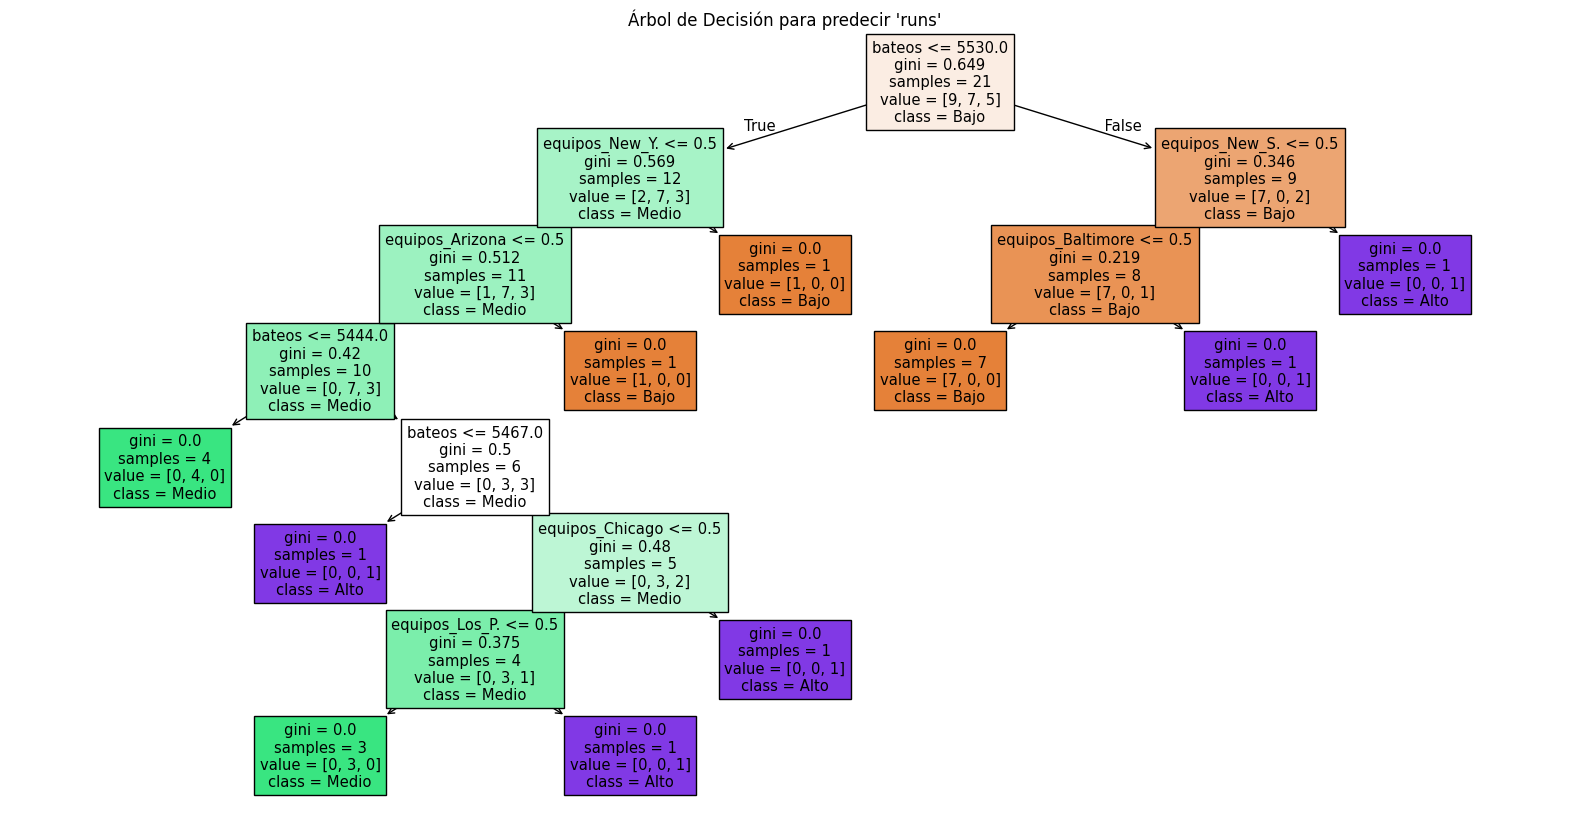

In [21]:
# ====================================
# 10) Gráfico del árbol
# ====================================

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Bajo','Medio','Alto'], filled=True)
plt.title("Árbol de Decisión para predecir 'runs'")
plt.show()

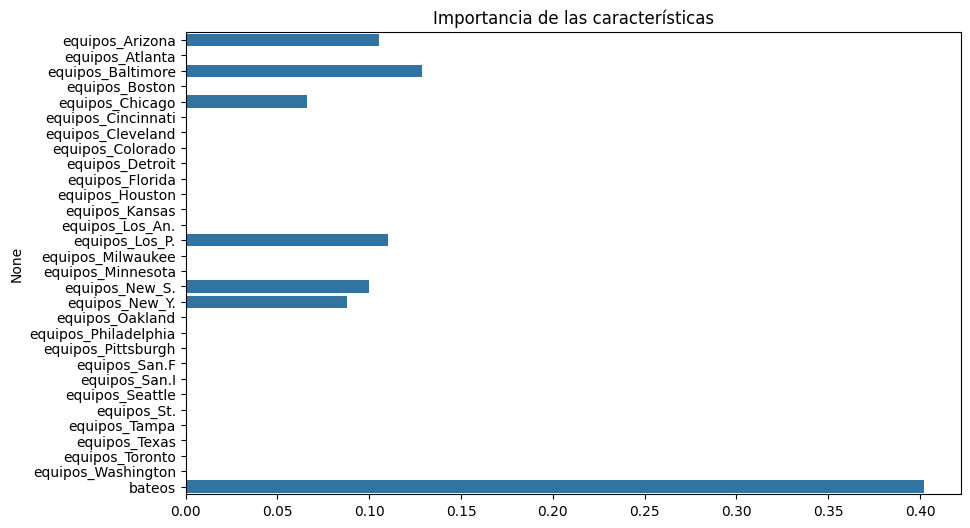

In [20]:
# ====================================
# 10) Importancia de características
# ====================================

feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Importancia de las características")
plt.show()